In [9]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

diabetes_df = pd.read_csv("../week_06/diabetes.csv")

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

In [61]:
model =tree.DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=42,max_features=9,max_leaf_nodes=7)

In [62]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       151
           1       0.58      0.75      0.66        80

    accuracy                           0.73       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.75      0.73      0.73       231



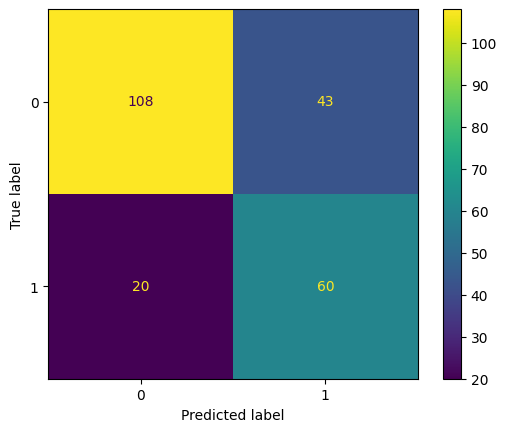

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [65]:
48/(48+32)

0.6

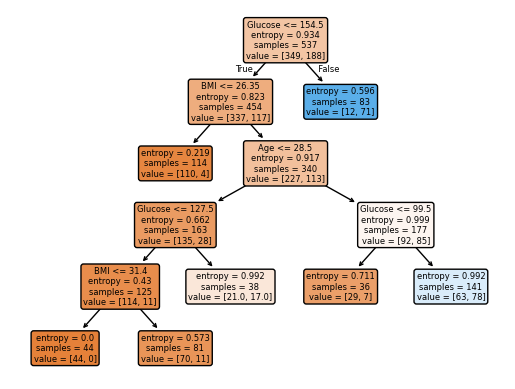

<Figure size 640x480 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names=list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("tree.svg")

In [92]:
def array_name(array):
    list = []
    string = ""
    x = 0
    for v in array:
        list.append(str(v.values()))
    while x <= int(len(list)-1):
        if x < int(len(list)-2):
            list[x] = str(list[x]) + ","
        elif x == int(len(list)-2):
            list[x] = str(list[x]) + " &"
        x += 1
    string = ' '.join(list)
    return string
array_name([ {'name': 'Niles'}, {'name': 'C.C.'}, {'name': 'Fran'} ])

"dict_values(['Niles']), dict_values(['C.C.']) & dict_values(['Fran'])"